<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-coefficients" data-toc-modified-id="Get-coefficients-1">Get coefficients</a></span></li><li><span><a href="#Match-experiments" data-toc-modified-id="Match-experiments-2">Match experiments</a></span></li></ul></div>

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x, y = sp.symbols('x y', real=True)

In [17]:
eq = x**2+2*x+y**2+4*y-4
eq

## Get coefficients

`all_coeffs` does *not* work with multivariable polynomials.

In [4]:
coefficients = eq.as_poly(x).all_coeffs()
coefficients

Use `coeffs` instead???

In [5]:
coefficients = eq.as_poly(x, y).coeffs()
coefficients

Or use dict representation???

In [6]:
eq

In [7]:
p = eq.as_poly(x, y)

In [8]:
p.degree()

In [9]:
coefficients = eq.as_poly(x, y).as_dict()
coefficients

In [10]:
eq = x**2 + 2*x + 4*y - 4
eq

In [11]:
coefficients = eq.as_poly(x, y).as_dict()
coefficients

In [12]:
coefficients.get((0,0))

In [13]:
coefficients.get((0,2), 0)

In [14]:
[coefficients.get((x, y), 0) for x in range(3) for y in range(3)]

The elements are

* 0: constant term F
* 1: E $y$
* 2: C $y^2$
* 3: D $x$
* 4: B $xy$: must be zero
* 5: _ $xy^2$: must be zero
* 6: A $x^2$
* 7: _ $x^2y$: must be zero
* 8: _ $x^2y^2$: must be zero

## Match experiments

In [3]:
expr = 2*(x + 1)**2 + 3
expr

In [4]:
a = sp.Wild('a')
b = sp.Wild('b')
c = sp.Wild('c')
m = expr.match(a * (x + b)**2 + c)
m

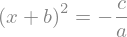

In [5]:
e2 = sp.Eq((x + b)**2, -c/a)
e2

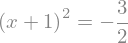

In [6]:
e3 = sp.Eq(e2.lhs.xreplace(m), e2.rhs.xreplace(m), evaluate=False)
e3

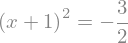

In [7]:
e3 = sp.Eq(e2.lhs.subs(m), e2.rhs.subs(m), evaluate=False)
e3

In [8]:
e = x**2 + 3*x
e

In [9]:
a = sp.Wild('a', exclude=[x,y])
b = sp.Wild('b', exclude=[x,y])
c = sp.Wild('c', exclude=[x,y])
e.match(a*x**2 + b*y**2 + c*x)

In [10]:
e = x**2 + 3*x + 4*y
e

In [11]:
e.match(a*x**2 + b*y**2 + c*x) is None

True

In [12]:
m

In [13]:
A = m[sp.Wild('a')]
B = m[sp.Wild('b')]
C = m[sp.Wild('c')]
print(A, B, C)

2 1 3
